In [65]:
import pandas as pd


In [66]:
# Load dataset
df = pd.read_csv("UTIDATASET.csv")


In [67]:
# STEP 1: Drop empty/irrelevant columns
# ---------------------------
df = df.drop(columns=[col for col in df.columns if "Unnamed" in col])


In [68]:
# STEP 2: Handle missing values
# ---------------------------
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].median(), inplace=True)   # numeric → median
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)  # categorical → mode



C:\Users\user\AppData\Local\Temp\ipykernel_18652\1977441737.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)   # numeric → median
C:\Users\user\AppData\Local\Temp\ipykernel_18652\1977441737.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [69]:
# STEP 3: Standardize categorical values
# ---------------------------
df['Gender'] = df['Gender'].str.strip().str.capitalize()   # " male " → "Male"
df['Leukocytes'] = df['Leukocytes'].astype(str).str.strip()



In [70]:
# ---------------------------
# STEP 4: Remove duplicates
# ---------------------------
df.drop_duplicates(inplace=True)


In [71]:
# ---------------------------
# STEP 5: Reset index
# ---------------------------
df.reset_index(drop=True, inplace=True)

In [72]:
# STEP 6: Optional → Encode categorical columns
# ---------------------------
# Gender: Male=0, Female=1
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [73]:
# Leukocytes: convert to numeric if binary (0/1), else keep as categorical codes
if set(df['Leukocytes'].unique()).issubset({'0', '1'}):
    df['Leukocytes'] = df['Leukocytes'].astype(int)
else:
    df['Leukocytes'] = df['Leukocytes'].astype('category').cat.codes

In [74]:

# ---------------------------
# Final check
# ---------------------------
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           1156 non-null   float64
 1   Gender        1153 non-null   float64
 2   Nitrites      1156 non-null   float64
 3   Erythrocytes  1156 non-null   float64
 4   Glucose       1156 non-null   float64
 5   Ketones       1156 non-null   float64
 6   Leukocytes    1156 non-null   int8   
 7   Diagnosis     1156 non-null   float64
dtypes: float64(7), int8(1)
memory usage: 64.5 KB
None
    Age  Gender  Nitrites  Erythrocytes  Glucose  Ketones  Leukocytes  \
0  97.0     1.0       0.0           0.0      0.0      0.0           1   
1  52.0     1.0       0.0           0.0      0.0      0.0           1   
2  43.0     1.0       0.0           1.0      0.0      0.0           1   
3  20.0     1.0       0.0           0.0      0.0      0.0           1   
4  32.0     1.0       0.0           0.0     

In [75]:
df.head()

,Age,Gender,Nitrites,Erythrocytes,Glucose,Ketones,Leukocytes,Diagnosis
0,97.0,1.0,0.0,0.0,0.0,0.0,1,0.0
1,52.0,1.0,0.0,0.0,0.0,0.0,1,1.0
2,43.0,1.0,0.0,1.0,0.0,0.0,1,1.0
3,20.0,1.0,0.0,0.0,0.0,0.0,1,1.0
4,32.0,1.0,0.0,0.0,0.0,0.0,0,0.0


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [77]:

# ---------------------------
# EDA (Exploratory Data Analysis)
# ---------------------------

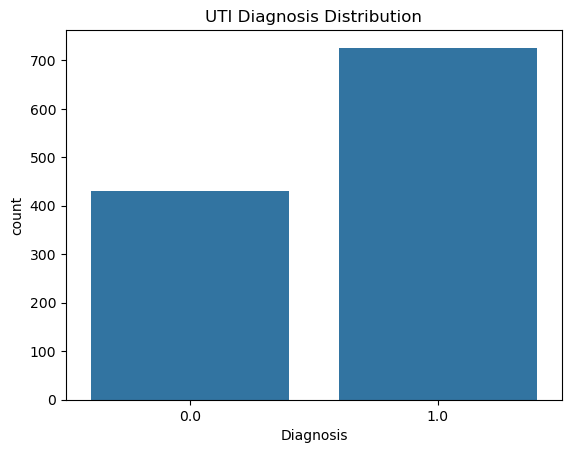

In [78]:
# Distribution of Diagnosis
sns.countplot(x='Diagnosis', data=df)
plt.title("UTI Diagnosis Distribution")
plt.show()



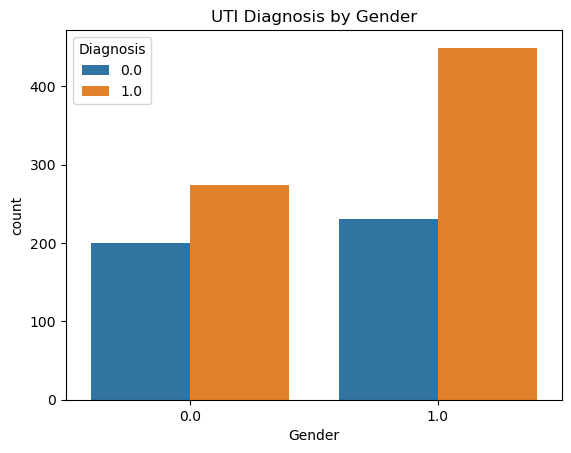

In [79]:

# Gender vs Diagnosis
sns.countplot(x='Gender', hue='Diagnosis', data=df)
plt.title("UTI Diagnosis by Gender")
plt.show()

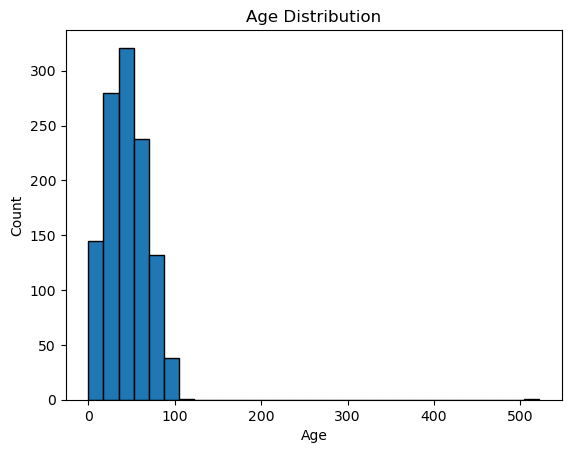

In [80]:
# Age Distribution
plt.hist(df['Age'], bins=30, edgecolor='k')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

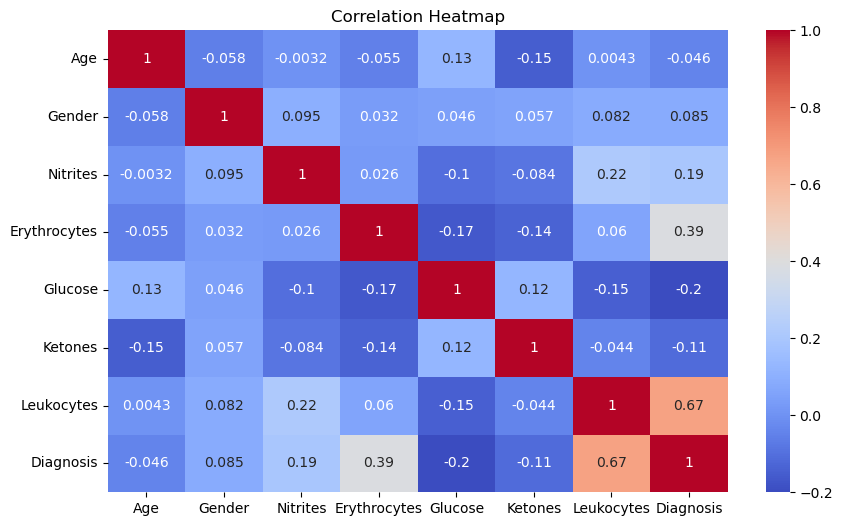

In [81]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [82]:

# ---------------------------
# ML Model Training
# ---------------------------

In [83]:

# Features & Target
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

In [84]:

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [85]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)]


In [86]:
# Candidate models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42)
}


In [87]:
# Ensure all missing values are handled
df = df.fillna(df.median(numeric_only=True))  # numeric cols
df = df.fillna(df.mode().iloc[0])             # categorical cols



In [88]:
# Double check
print(df.isnull().sum())


Age             0
Gender          0
Nitrites        0
Erythrocytes    0
Glucose         0
Ketones         0
Leukocytes      0
Diagnosis       0
dtype: int64


In [89]:
df.head()

,Age,Gender,Nitrites,Erythrocytes,Glucose,Ketones,Leukocytes,Diagnosis
0,97.0,1.0,0.0,0.0,0.0,0.0,1,0.0
1,52.0,1.0,0.0,0.0,0.0,0.0,1,1.0
2,43.0,1.0,0.0,1.0,0.0,0.0,1,1.0
3,20.0,1.0,0.0,0.0,0.0,0.0,1,1.0
4,32.0,1.0,0.0,0.0,0.0,0.0,0,0.0


In [90]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [91]:
# Separate features/target
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

In [92]:
# Identify numeric and categorical columns
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
cat_cols = X.select_dtypes(exclude=['float64', 'int64']).columns


In [93]:
# Preprocessing: impute + scale
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)


In [94]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [95]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [96]:
# Candidate models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42)
}

In [97]:
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),   # fill NaNs with mode
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])


In [99]:
# Train & evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Logistic Regression Accuracy: 0.9224
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90        86
         1.0       0.94      0.94      0.94       146

    accuracy                           0.92       232
   macro avg       0.92      0.92      0.92       232
weighted avg       0.92      0.92      0.92       232

Confusion Matrix:
 [[ 77   9]
 [  9 137]]

Random Forest Accuracy: 0.8103
              precision    recall  f1-score   support

         0.0       0.72      0.79      0.76        86
         1.0       0.87      0.82      0.85       146

    accuracy                           0.81       232
   macro avg       0.80      0.81      0.80       232
weighted avg       0.82      0.81      0.81       232

Confusion Matrix:
 [[ 68  18]
 [ 26 120]]

SVM Accuracy: 0.9353
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.91        86
         1.0       0.95      0.95      0.95       146

    ac

In [100]:
# Choose Best Model (based on accuracy)
# ---------------------------
best_model = max(models.items(), key=lambda m: accuracy_score(y_test, m[1].predict(X_test)))
print(f"\n✅ Best Model: {best_model[0]}")


✅ Best Model: SVM


In [63]:
# Store results
results = {}

plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

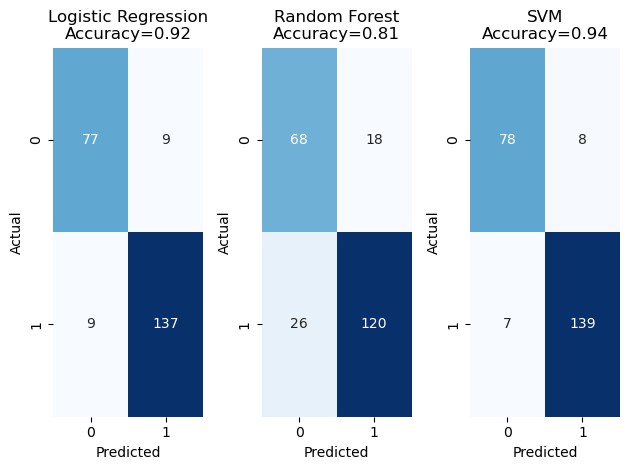

In [101]:
# Plot confusion matrices for each model
for i, (name, model) in enumerate(models.items(), 1):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    plt.subplot(1, 3, i)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{name}\nAccuracy={acc:.2f}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()


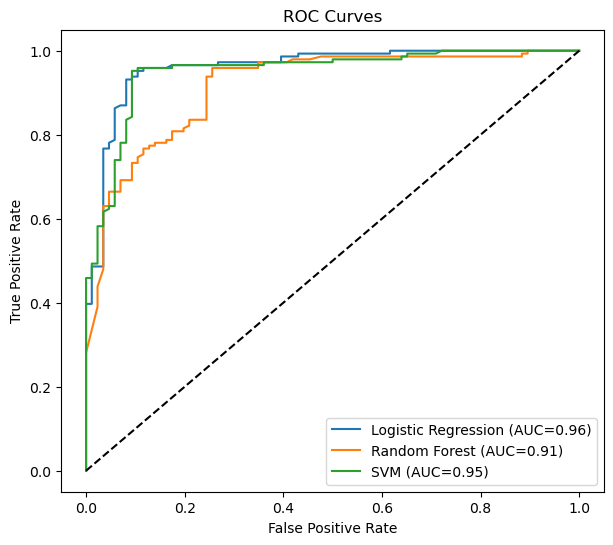

In [102]:
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc
# --- ROC CURVES ---
plt.figure(figsize=(7, 6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:  # for SVM without probability
        y_score = model.decision_function(X_test)
        
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend(loc="lower right")
plt.show()

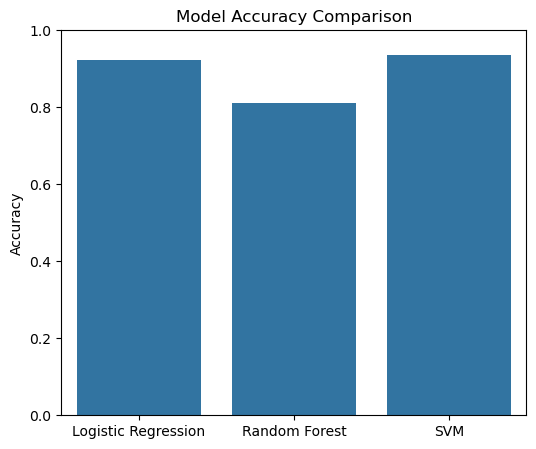

In [103]:
# --- Accuracy Bar Chart ---
plt.figure(figsize=(6, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.show()